In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [152]:
data = pd.read_csv('C:\python\Lib\CarPrice_Assignment.csv')

print(data.fuelsystem.value_counts())
# Data preprocessing and feature selection
X = data[['citympg','compressionratio','enginesize','boreratio','horsepower','carlength','carwidth','peakrpm']]  # Features (independent variables)
y = data['price']
for i in X.T:
    fmin = X.min()
    frange = X.max() - X.min()
    X -= fmin
    X /= frange
print(X)

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64
      citympg  compressionratio  enginesize  boreratio  horsepower  carlength  \
0    0.222222           0.12500    0.260377   0.664286    0.262500   0.413433   
1    0.222222           0.12500    0.260377   0.664286    0.262500   0.413433   
2    0.166667           0.12500    0.343396   0.100000    0.441667   0.449254   
3    0.305556           0.18750    0.181132   0.464286    0.225000   0.529851   
4    0.138889           0.06250    0.283019   0.464286    0.279167   0.529851   
..        ...               ...         ...        ...         ...        ...   
200  0.277778           0.15625    0.301887   0.885714    0.275000   0.711940   
201  0.166667           0.10625    0.301887   0.885714    0.466667   0.711940   
202  0.138889           0.11250    0.422642   0.742857    0.358333   0.711940   
203  0.361111           1.00000    0.316981   0.335714    0.24166

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:
weights = np.zeros(X_train.shape[1])
learning_rate = 0.5
num_iterations = 40000
cost_history = []
print(weights)
bias=1058

[0. 0. 0. 0. 0. 0. 0. 0.]


In [155]:
def costF(y_train,predictions):
    N = len(y_train)
    sq_error = (predictions - y_train) ** 2
    print(1.0 / (2 * N) * sq_error.sum())
    return 1.0 / (2 * N) * sq_error.sum()

In [156]:
for i in range(num_iterations):
    predictions = np.dot(X_train, weights)+bias
    error = predictions-y_train
    dw = np.dot(X_train.T, error) / (X_train.shape[0])
    db = np.sum(error) / (X_train.shape[0])
    weights -= dw*learning_rate
    bias -= learning_rate * db
    current_cost = costF(y_train, predictions)
    cost_history.append(current_cost)

103817575.30335367
21592704.78587557
19210352.305832524
18042608.056782167
17001353.05470014
16060676.965776423
15210317.5159462
14441227.728400504
13745277.085238818
13115156.34758177
12544294.387919782
12026783.477953069
11557312.143444013
11131104.819180235
10743867.61526116
10391739.575696483
10071248.873006845
9779273.438867515
9513005.581478255
9269920.18585536
9047746.13414416
8844440.619809657
8658166.062598754
8487269.36085688
8330263.244464005
8185809.515634256
8052703.986373768
7929862.940758845
7816310.967602147
7711170.024717113
7613649.610048957
7523037.927574645
7438693.947228496
7360040.268314341
7286556.705035722
7217774.5210172525
7153271.247097145
7092666.023327476
7035615.412101054
6981809.634700181
6930969.188394241
6882841.805555579
6837199.720165454
6793837.210589203
6752568.3906516265
6713225.223876395
6675655.738298934
6639722.421550245
6605300.777965273
6572278.031317268
6540551.95844041
6510029.840495374
6480627.519973951
6452268.552744253
6424883.4455214
639

In [157]:
predictions_test = np.dot(X_test, weights)

In [160]:
y_mean = y_test.mean()
tss = ((y_test - y_mean) ** 2).sum()

rss = ((y_test - predictions_test) ** 2).sum()

r_squared = 1 - (rss / tss)

print(f'R-squared (R²) value: {r_squared:.4f}')

R-squared (R²) value: 0.7820


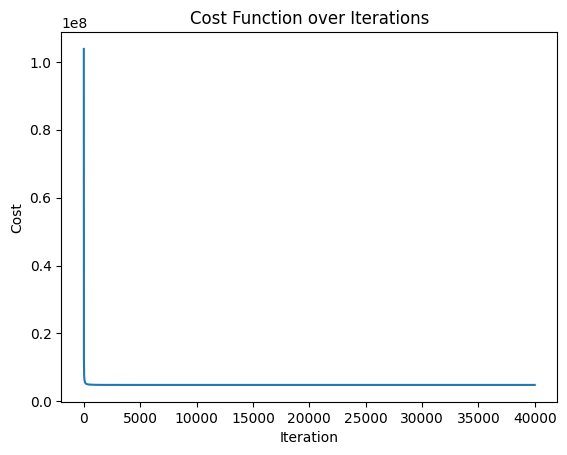

In [159]:
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()